## Importing Libraries

In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing

## Training image preprocessing

In [44]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


## Validation image Preprocessing

In [45]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [46]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [47]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[206.5  201.5  198.5 ]
   [189.   184.   181.  ]
   [192.75 187.75 184.75]
   ...
   [159.   146.   140.  ]
   [165.25 152.25 146.25]
   [167.75 154.75 148.75]]

  [[190.   185.   182.  ]
   [181.5  176.5  173.5 ]
   [177.5  172.5  169.5 ]
   ...
   [169.5  156.5  150.5 ]
   [172.   159.   153.  ]
   [156.75 143.75 137.75]]

  [[205.25 200.25 197.25]
   [206.75 201.75 198.75]
   [191.   186.   183.  ]
   ...
   [148.25 135.25 129.25]
   [156.75 143.75 137.75]
   [159.75 146.75 140.75]]

  ...

  [[194.5  190.5  187.5 ]
   [184.   180.   177.  ]
   [199.5  195.5  192.5 ]
   ...
   [187.25 176.25 170.25]
   [181.5  170.5  164.5 ]
   [183.25 172.25 166.25]]

  [[195.75 191.75 188.75]
   [189.75 185.75 182.75]
   [191.   187.   184.  ]
   ...
   [185.25 174.25 168.25]
   [186.75 175.75 169.75]
   [186.75 175.75 169.75]]

  [[187.   183.   180.  ]
   [175.75 171.75 168.75]
   [190.75 186.75 183.75]
   ...
   [172.25 161.25 155.25]
   [184.   173.   167.  ]
   [181.25 170.25 16

# To avoid Overshooting loss Function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

# Building Model

In [48]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [49]:
model = Sequential()

## Building Convolution Layer

In [50]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [51]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [52]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [53]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [54]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [55]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [56]:
model.add(Flatten())

In [57]:
model.add(Dense(units=1500,activation='relu'))


In [58]:
model.add(Dropout(0.4))

In [59]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model


In [60]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [61]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [62]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1781s 809ms/step - accuracy: 0.3767 - loss: 2.2259 - val_accuracy: 0.8281 - val_loss: 0.5603
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1717s 782ms/step - accuracy: 0.8262 - loss: 0.5556 - val_accuracy: 0.9059 - val_loss: 0.2927
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1643s 748ms/step - accuracy: 0.9032 - loss: 0.2997 - val_accuracy: 0.9103 - val_loss: 0.2727
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1638s 746ms/step - accuracy: 0.9320 - loss: 0.2083 - val_accuracy: 0.9481 - val_loss: 0.1582
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1643s 748ms/step - accuracy: 0.9509 - loss: 0.1488 - val_accuracy: 0.9426 - val_loss: 0.1815
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1635s 744ms/step - accuracy: 0.9613 - loss: 0.1179 - val_accuracy: 0.9527 - val_loss: 0.1486
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1613s 734ms/step - accuracy: 0.9693 - loss: 0.0909 - val_accuracy: 0.9663 - val_loss: 0.1094
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1617s 736ms/s

# Model Evaluation

In [63]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 441s 200ms/step - accuracy: 0.9821 - loss: 0.0561


In [64]:
print(train_loss,train_acc)

0.05197891220450401 0.9835692644119263


In [65]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 115s 209ms/step - accuracy: 0.9511 - loss: 0.1724


In [66]:
print(val_loss,val_acc)

0.16910098493099213 0.952481210231781


# Saving Model

In [67]:
model.save("trained_model.keras")

In [68]:
training_history.history

{'accuracy': [0.5799843668937683,
  0.8525499701499939,
  0.9144178032875061,
  0.9367380142211914,
  0.952301025390625,
  0.9640657305717468,
  0.9702396988868713,
  0.9762429594993591,
  0.9788036346435547,
  0.9819901585578918],
 'loss': [1.4348608255386353,
  0.465614378452301,
  0.2669317126274109,
  0.19172757863998413,
  0.14269231259822845,
  0.10902868211269379,
  0.09040804207324982,
  0.07305899262428284,
  0.0641033947467804,
  0.0551476925611496],
 'val_accuracy': [0.8281356692314148,
  0.9059298634529114,
  0.9103118777275085,
  0.9480992555618286,
  0.9425790905952454,
  0.9527088403701782,
  0.9663100242614746,
  0.9626678824424744,
  0.9561802744865417,
  0.952481210231781],
 'val_loss': [0.5602924823760986,
  0.29267236590385437,
  0.27271053194999695,
  0.15824005007743835,
  0.18148598074913025,
  0.1486213505268097,
  0.10939701646566391,
  0.11826197057962418,
  0.1453573852777481,
  0.16910099983215332]}

In [69]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [70]:
training_history.history['val_accuracy']

[0.8281356692314148,
 0.9059298634529114,
 0.9103118777275085,
 0.9480992555618286,
 0.9425790905952454,
 0.9527088403701782,
 0.9663100242614746,
 0.9626678824424744,
 0.9561802744865417,
 0.952481210231781]

# Accuracy Visualization

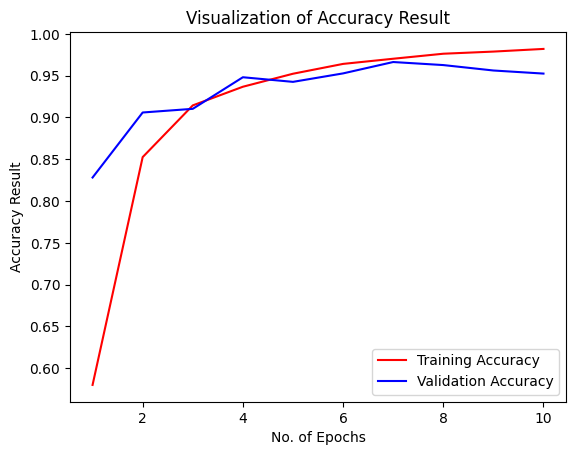

In [71]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

# Some Other Metrics for model Evaluation

In [72]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [73]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [74]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 113s 205ms/step


(array([[9.9876368e-01, 1.8219008e-07, 8.7440895e-11, ..., 2.7391612e-14,
         3.3929575e-14, 1.2724550e-12],
        [9.9965000e-01, 3.1770385e-04, 3.3629091e-10, ..., 6.2127008e-16,
         2.9833449e-15, 1.5989244e-14],
        [1.0000000e+00, 5.4173993e-10, 7.5095485e-13, ..., 4.5182240e-20,
         4.6186759e-18, 5.6458801e-16],
        ...,
        [3.7623303e-12, 4.2068984e-15, 1.0901381e-10, ..., 4.2374034e-15,
         5.2255741e-15, 1.0000000e+00],
        [4.3687815e-14, 6.5733350e-17, 4.6734605e-13, ..., 3.3157369e-17,
         8.8263116e-17, 1.0000000e+00],
        [1.2892862e-16, 6.3880361e-16, 6.7612071e-15, ..., 2.4330260e-18,
         2.6159901e-16, 9.9999988e-01]], dtype=float32),
 (17572, 38))

In [75]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [76]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [77]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [78]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [82]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.96      0.95       504
                                 Apple___Black_rot       0.98      0.97      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.90      0.93       440
                                   Apple___healthy       0.99      0.92      0.95       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.91      1.00      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.87      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.97      0.

In [84]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[483,  11,   0, ...,   0,   0,   0],
       [  0, 482,   0, ...,   0,   0,   0],
       [  3,   0, 395, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 479,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   1, ...,   0,   0, 478]])

# Confusion Matrix Visualization

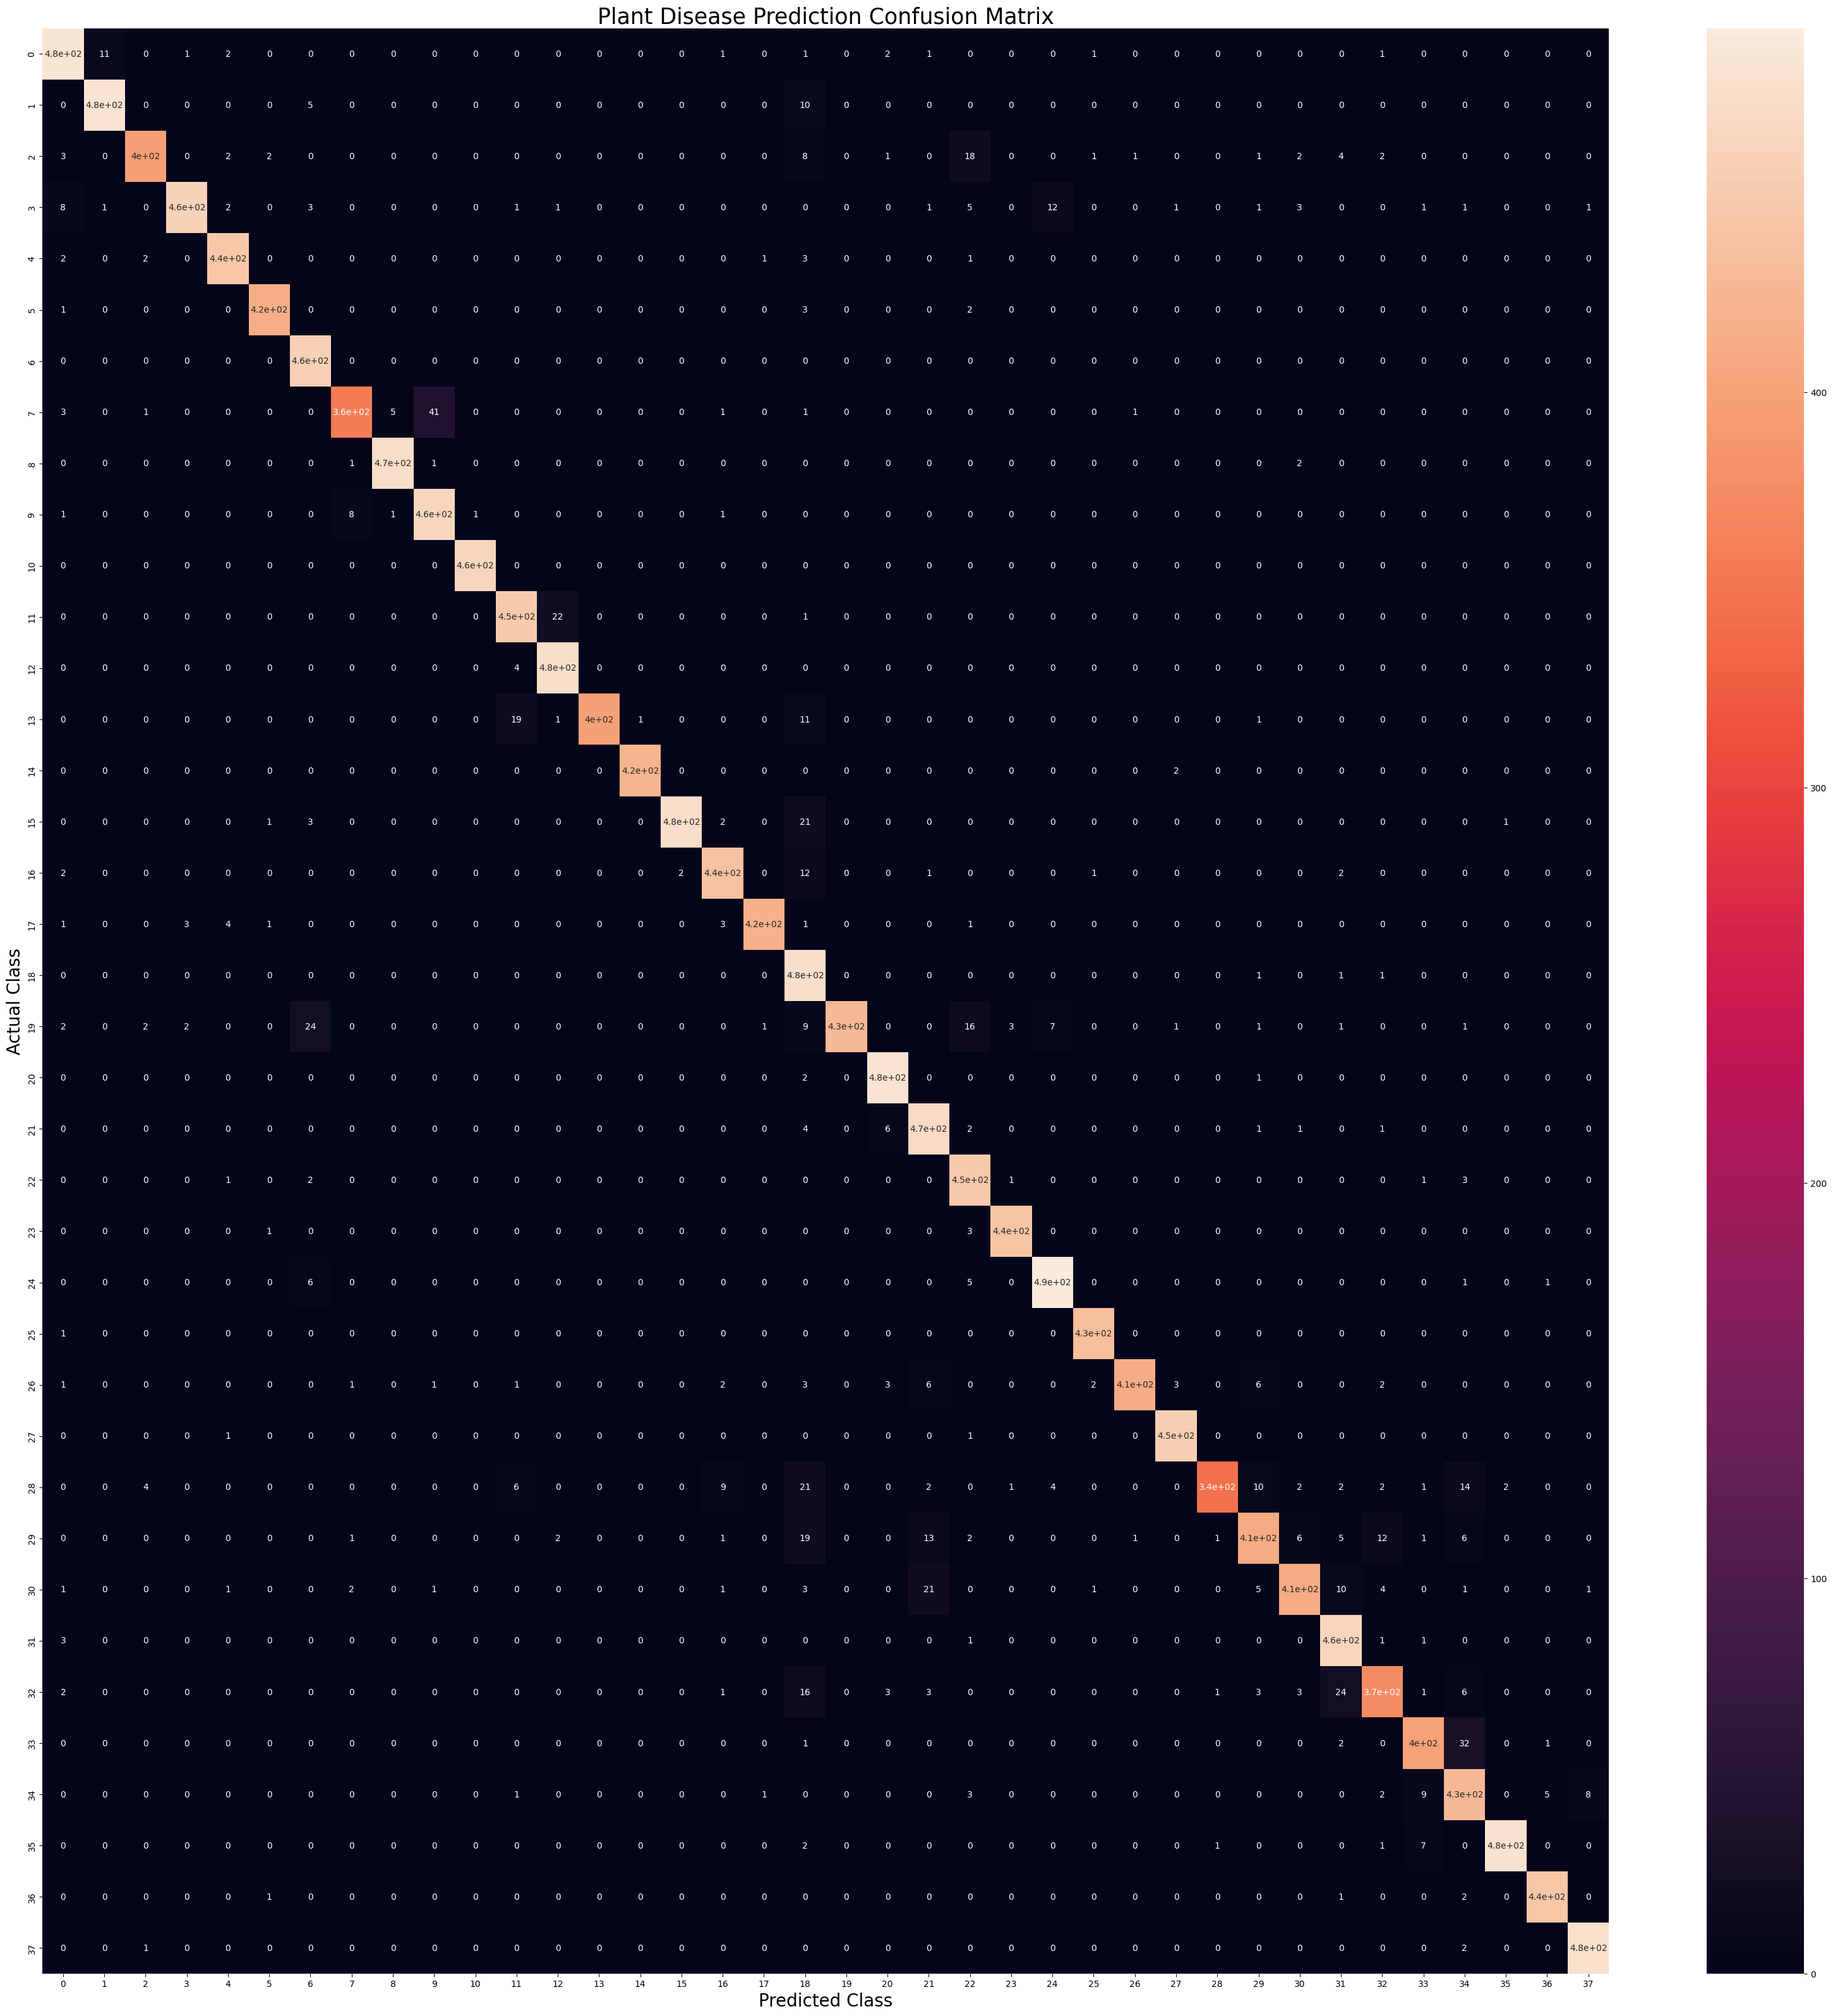

In [85]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()